# <center>***Titanic: Machine Learning From Disaster***</center>

<br>

**Import Neccessary Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


In [3]:
from google.colab import files
uploaded2 = files.upload()

Saving test.csv to test.csv


**Import the Dataset**

In [4]:
import pandas as pd
import io
train=pd.read_csv(io.BytesIO(uploaded['train.csv']))
test = pd.read_csv(io.BytesIO(uploaded2['test.csv']))

<br>

**Data Overview**

In [5]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
train.shape

(891, 12)

<br>

**Preprocessing**

Removing unneccessary parameters that have no significance in making the required prediction of survival.

In [9]:
train.drop(['PassengerId','Name','Ticket','Fare','Embarked'],axis=1, inplace=True)

In [10]:
train.describe()

,Survived,Pclass,Age,SibSp,Parch
count,891.000000,891.000000,714.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594
std,0.486592,0.836071,14.526497,1.102743,0.806057
min,0.000000,1.000000,0.420000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000
50%,0.000000,3.000000,28.000000,0.000000,0.000000
75%,1.000000,3.000000,38.000000,1.000000,0.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000


In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Cabin     204 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 48.9+ KB


In [12]:
train.loc[train['Sex']=='male','Sex']=1
train.loc[train['Sex']=='female','Sex']=0

<br>

**Exploratory Data Analysis**

In [13]:
train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

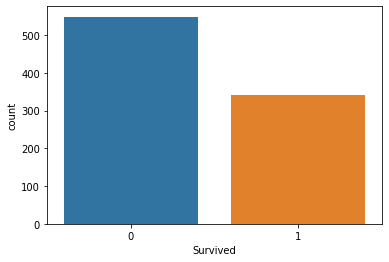

In [14]:
sns.countplot(data=train,x='Survived')

In [15]:
train.corr()['Survived'].sort_values()

Pclass     -0.338481
Age        -0.077221
SibSp      -0.035322
Parch       0.081629
Survived    1.000000
Name: Survived, dtype: float64

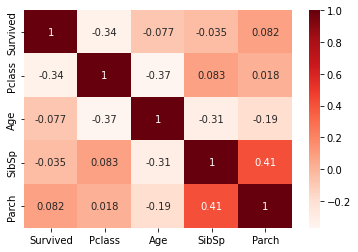

In [16]:
sns.heatmap(train.corr(), annot=True,cmap='Reds')

<br>

**Handling Missing Data**

In [17]:
100*(train.isnull().sum()/len(train))

Survived     0.000000
Pclass       0.000000
Sex          0.000000
Age         19.865320
SibSp        0.000000
Parch        0.000000
Cabin       77.104377
dtype: float64

In [18]:
def missing_percent(train):
    nan_percent= 100*(train.isnull().sum()/len(train))
    nan_percent= nan_percent[nan_percent>0].sort_values()
    return nan_percent

In [19]:
nan_percent= missing_percent(train)

In [20]:
nan_percent

Age      19.865320
Cabin    77.104377
dtype: float64

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

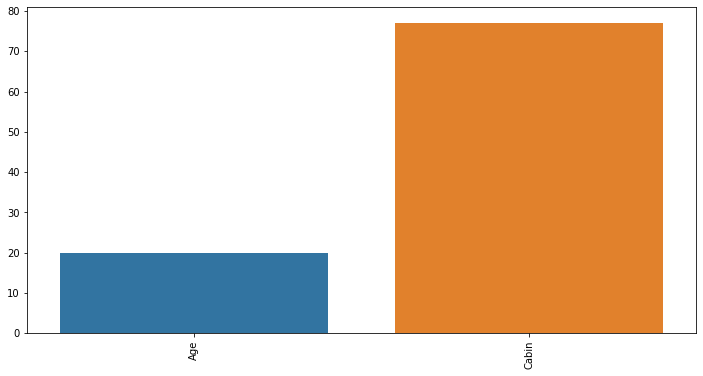

In [21]:
plt.figure(figsize=(12,6))
sns.barplot(x=nan_percent.index, y=nan_percent)
plt.xticks(rotation=90)

In [22]:
train.drop("Cabin", axis = 1, inplace = True)

In [23]:
train["Age"].fillna(train["Age"].mean(), inplace = True)

In [24]:
train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
dtype: int64

<br>

**Features & Label**

In [25]:
X=train.drop('Survived' ,axis=1)
y= train['Survived']

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [28]:
from sklearn.preprocessing import StandardScaler

In [29]:
X_train

,Pclass,Sex,Age,SibSp,Parch
825,3,1,29.699118,0,0
8,3,0,27.000000,0,2
689,1,0,15.000000,0,1
513,1,0,54.000000,1,0
729,3,0,25.000000,1,0
...,...,...,...,...,...
575,3,1,19.000000,0,0
838,3,1,32.000000,0,0
337,1,0,41.000000,0,0
523,1,0,44.000000,0,1


<br>

**Scalling The Features**

In [30]:
scaler=StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [31]:
scaler_X_Train=scaler.transform(X_train)
scaler_X_Test=scaler.transform(X_test)

<br>

**Train the Model**

In [32]:
from sklearn.linear_model import LogisticRegression

In [33]:
model=LogisticRegression()
model.fit(scaler_X_Train,y_train)

LogisticRegression()

<br>

**Predicting Test Data**

In [34]:
y_pred=model.predict(scaler_X_Test)

<br>

**Evaluating the Model**

In [35]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_confusion_matrix,precision_recall_curve,precision_recall_fscore_support,plot_roc_curve

In [36]:
accuracy_score(y_test,y_pred)

0.7888888888888889

In [37]:
confusion_matrix(y_test,y_pred)

array([[44,  7],
       [12, 27]])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


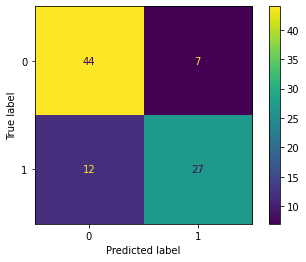

In [38]:
plot_confusion_matrix(model,scaler_X_Test,y_test)

In [39]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.86      0.82        51
           1       0.79      0.69      0.74        39

    accuracy                           0.79        90
   macro avg       0.79      0.78      0.78        90
weighted avg       0.79      0.79      0.79        90



<br>

<br>